<a href="https://colab.research.google.com/github/simandi2877/eva/blob/master/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

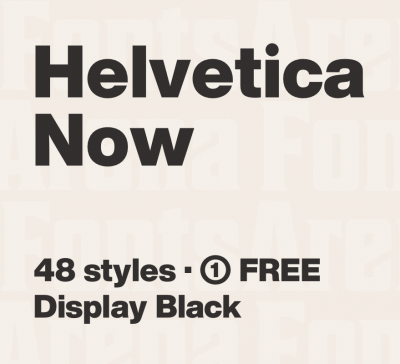

In [3]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

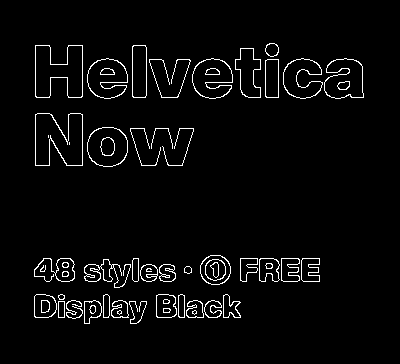

In [5]:
cv2_imshow(edges)

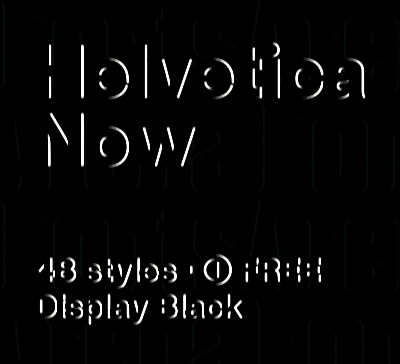

In [6]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Horizontal Edge Detector

---



Following Sobel filter for horitizontal edge detection will detect the edges formed by pixels moving from dark region to bright region of the image.

\begin{bmatrix}
    -1 & -2 & -1 \\
    0 & 0 & 0 \\
    1 & 2 & 1
  \end{bmatrix}

Following Sobel filter for horizontal edge detection is  will detect the edges formed by pixels moving from bright region to dark region of the image.

\begin{bmatrix}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1
  \end{bmatrix}

Sobel filter applies Gaussian smoothing to reduce the noise before edge detection. Noise is introduced in the image by the device which captures the images, so this is called digital noise. So, image noise is random variation  of color or brightness information in the image. 

In the output of below code, observe the difference in edge detection for alphabets V and W. Left image has outer slanting lines of V are detected as the filter tries to identify the edges formed by dark to bright transitions. The right image has inner slanting lines of V are detected as the filter tries to indentify the edges formed by bright to dark transitions.

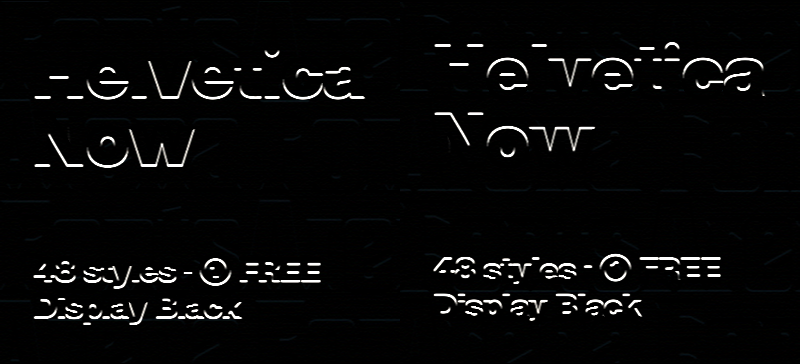

In [18]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]])
dst = cv2.filter2D(image,-1,kernel)
#cv2_imshow(dst)


kernel1 = np.float32([[1,2,1],[0,0,0],[-1,-2,-1]])
dst1 = cv2.filter2D(image,-1,kernel1)
#cv2_imshow(dst1)

numpy_horizontal_concat = np.concatenate((dst, dst1), axis=1)
cv2_imshow(numpy_horizontal_concat)


### 45 angle edge detection

Following Sobel filter will detect the +45 degrees edge.

\begin{bmatrix}
    -1 & -2 & 0 \\
    -1 & 0 & 1 \\
    0 & 2 & 1
  \end{bmatrix}

Following Sobel filter will detect the -45 degrees edge

\begin{bmatrix}
    0 & -2 & -1 \\
    1 & 0 & -1 \\
    1 & 2 & 0
  \end{bmatrix}

Sobel filter applies Gaussian smoothing to reduce the noise before edge detection. Noise is introduced in the image by the device which captures the images, so this is called digital noise. So, image noise is random variation  of color or brightness information in the image. 

Observe the the letter V in below code output. First image has right slanting line of V is detected wheras in the second image left outer slanting line of V is detected. 

Also, if the kernels are tansposed, then we can detec the edges formed by bright area to dark regions transition.

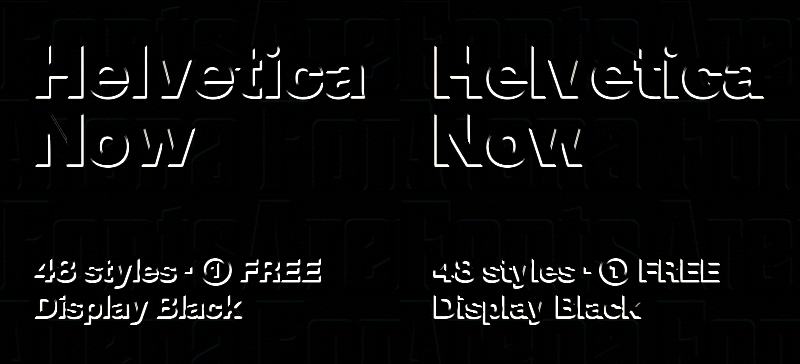

In [20]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-2,0],[-1,0,1],[0,2,1]])
dst = cv2.filter2D(image,-1,kernel)
#cv2_imshow(dst)


kernel1 = np.float32([[0,-2,-1],[1,0,-1],[1,2,0]])
dst1 = cv2.filter2D(image,-1,kernel1)
#cv2_imshow(dst1)

numpy_horizontal_concat = np.concatenate((dst, dst1), axis=1)
cv2_imshow(numpy_horizontal_concat)

### Blurring an image

Blurring operation is reducing the digital value of each pixel in an image. For example an image has pixel values as follows

\begin{bmatrix}
    50 & 100 & 150 \\
    50 & 100 & 150 \\
    50 & 100 & 150
  \end{bmatrix}

If we take a 1x1 kernle of size 0.25, then the image pixel values would have reduce as follows. This output would be blurred than the initial image.
\begin{bmatrix}
    12.5 & 25 & 37.5 \\
    12.5 & 25 & 37.5 \\
    12.5 & 25 & 37.5
  \end{bmatrix}

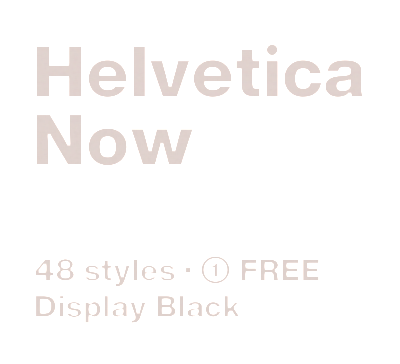

In [36]:
kernel = np.ones((3,3),np.float32)/2
#kernel = np.float32([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Sharpen and image

Sharpening an image is opposite of blurring, i.e popping out the intensity of pixels.

Following kernel is an example for popping out the image. The sum of the values in kernel should be 1.


\begin{bmatrix}
    -1 & -1 & -1 \\
    -1 & 9 & -1 \\
    -1 & -1 & -1
  \end{bmatrix}


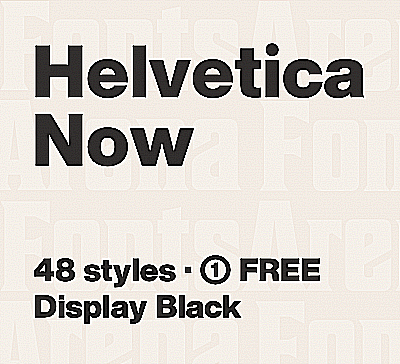

In [38]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

### Identity function

Identify funciton will generate the image as is. Only issue is that the information in the corners pixels will be lost.

Following is the kernel.

\begin{bmatrix}
    0 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 0
  \end{bmatrix}


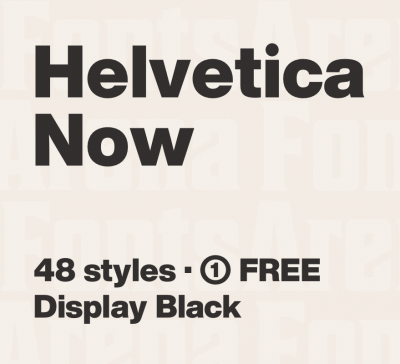

In [39]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)